In [70]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Global variables
path_root = "G:\\CIAT\\Code\\CWR\\perfect_diet\\src\\"
path_inputs = path_root +"inputs\\"
path_outputs = path_root + "outputs\\"

# Loading data

groups = pd.read_csv(path_inputs + "groups.csv", encoding = "ISO-8859-1")
fao = pd.read_csv(path_inputs + "faostat-food_supply.csv", encoding = "ISO-8859-1")
dash = pd.read_csv(path_inputs + "dash_reference.csv", encoding = "ISO-8859-1")
dash = dash.sort_values(['food_group'],ascending=[1])
data = pd.merge(fao, groups, left_on = "Item Code",right_on="Item Code",how='inner')


print(data.columns.values)

['Area Code' 'Area' 'Item Code' 'Item_x' 'Element Code' 'Element' 'Unit'
 'Y1961' 'Y1961F' 'Y1962' 'Y1962F' 'Y1963' 'Y1963F' 'Y1964' 'Y1964F'
 'Y1965' 'Y1965F' 'Y1966' 'Y1966F' 'Y1967' 'Y1967F' 'Y1968' 'Y1968F'
 'Y1969' 'Y1969F' 'Y1970' 'Y1970F' 'Y1971' 'Y1971F' 'Y1972' 'Y1972F'
 'Y1973' 'Y1973F' 'Y1974' 'Y1974F' 'Y1975' 'Y1975F' 'Y1976' 'Y1976F'
 'Y1977' 'Y1977F' 'Y1978' 'Y1978F' 'Y1979' 'Y1979F' 'Y1980' 'Y1980F'
 'Y1981' 'Y1981F' 'Y1982' 'Y1982F' 'Y1983' 'Y1983F' 'Y1984' 'Y1984F'
 'Y1985' 'Y1985F' 'Y1986' 'Y1986F' 'Y1987' 'Y1987F' 'Y1988' 'Y1988F'
 'Y1989' 'Y1989F' 'Y1990' 'Y1990F' 'Y1991' 'Y1991F' 'Y1992' 'Y1992F'
 'Y1993' 'Y1993F' 'Y1994' 'Y1994F' 'Y1995' 'Y1995F' 'Y1996' 'Y1996F'
 'Y1997' 'Y1997F' 'Y1998' 'Y1998F' 'Y1999' 'Y1999F' 'Y2000' 'Y2000F'
 'Y2001' 'Y2001F' 'Y2002' 'Y2002F' 'Y2003' 'Y2003F' 'Y2004' 'Y2004F'
 'Y2005' 'Y2005F' 'Y2006' 'Y2006F' 'Y2007' 'Y2007F' 'Y2008' 'Y2008F'
 'Y2009' 'Y2009F' 'Y2010' 'Y2010F' 'Y2011' 'Y2011F' 'Y2012' 'Y2012F'
 'Y2013' 'Y2013F' 'Item_y' 'De

In [71]:
# Filtering data (World)

columns = ["Area","Item_x","Food group","Description","Element Code","Element","Unit","Y2013","Y2013F"]

world = data.loc[((data.Area == "World") & (data["Food group"] != "Grand Total")),columns]

print(world[["Element Code","Element"]].drop_duplicates())



      Element Code                                 Element
1060           641           Food supply quantity (tonnes)
1061           646     Food supply quantity (g/capita/day)
1062           645     Food supply quantity (kg/capita/yr)
1063           664           Food supply (kcal/capita/day)
1064           674  Protein supply quantity (g/capita/day)
1065           684      Fat supply quantity (g/capita/day)


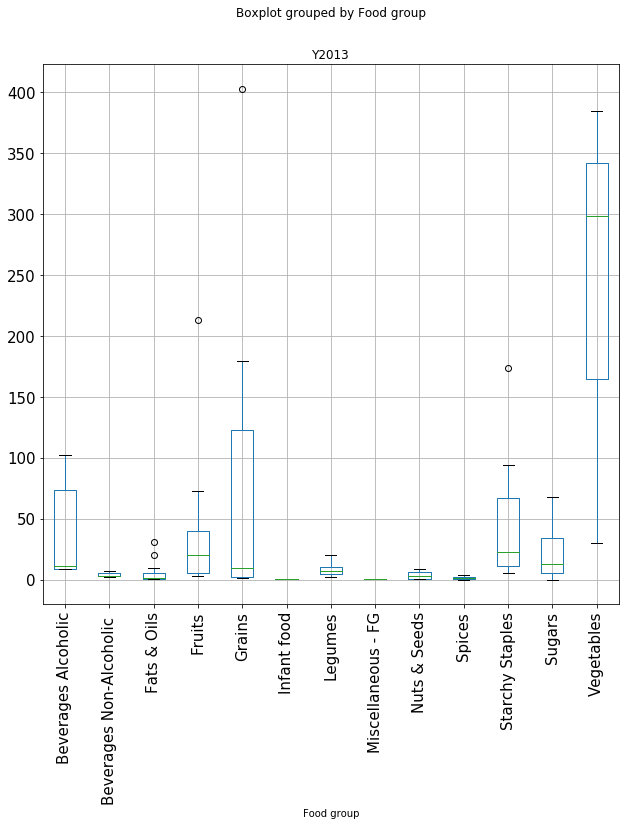

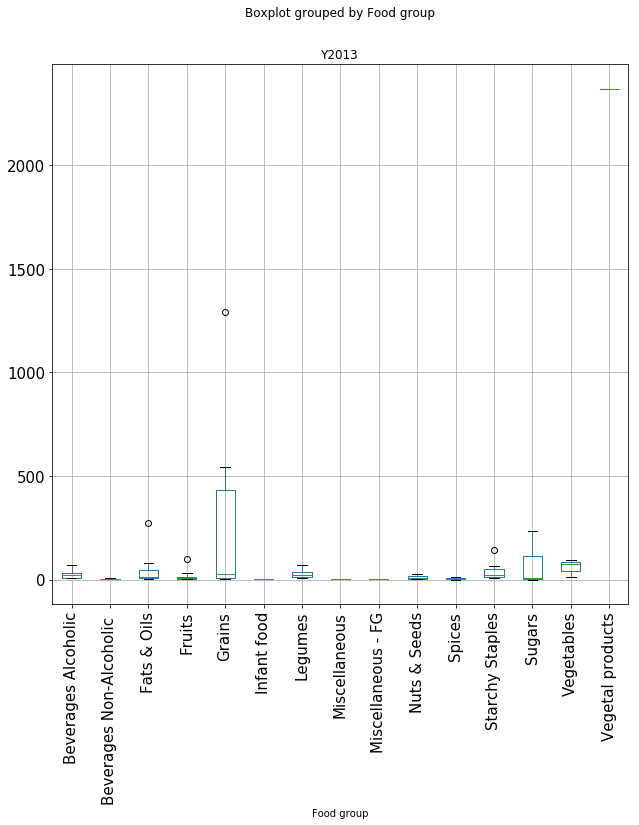

In [72]:
fs_g_d = world[world["Element Code"]==646]
fs_kcal = world[world["Element Code"]==664]

fs_g_d.boxplot(column=["Y2013"],by='Food group',rot=90, fontsize=15, figsize=(10, 10))
fs_kcal.boxplot(column=["Y2013"],by='Food group',rot=90, fontsize=15, figsize=(10, 10))

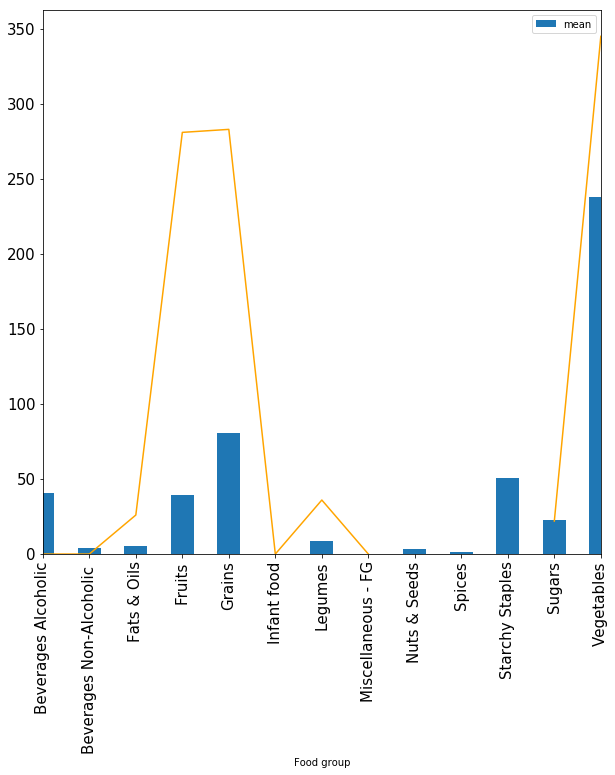

In [81]:
fig, ax = plt.subplots()
#print(dash.head())
fs_g_d_agg = fs_g_d.groupby('Food group').agg(['mean']).sort_values(['Food group'],ascending=[1]).reset_index()
fs_g_d_agg.plot.bar(y="Y2013",x="Food group", ax=ax,rot=90, fontsize=15, figsize=(10, 10))

fs_g_d_groups = fs_g_d_agg['Food group']
dash_d_g = dash[dash["food_group"].isin(fs_g_d_groups)].reset_index()

dash_d_g.d_g.plot(ax=ax, color = 'orange',rot=90, fontsize=15, figsize=(10, 10))
plt.show()